# Setup
Import TensorFlow and other necessary libraries:

In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL 
import seaborn as sns

# Import and explore the dataset

dataset of about 3,700 photos of flowers. The dataset contains two sub-directories, one per class:

''' flower_photo/ 
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/ '''

In [3]:
import pathlib

# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path('./Flower Dataset').with_suffix('')
data_dir

WindowsPath('Flower Dataset')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1821


In [5]:
list(data_dir.glob('daisy/*'))[:2]

[WindowsPath('Flower Dataset/daisy/100080576_f52e8ee070_n_jpg.rf.77fc70826524be2700a7465c39dd2663.jpg'),
 WindowsPath('Flower Dataset/daisy/10140303196_b88d3d6cec_jpg.rf.2f4f52a5d9739ed87bd185a3af4904ed.jpg')]

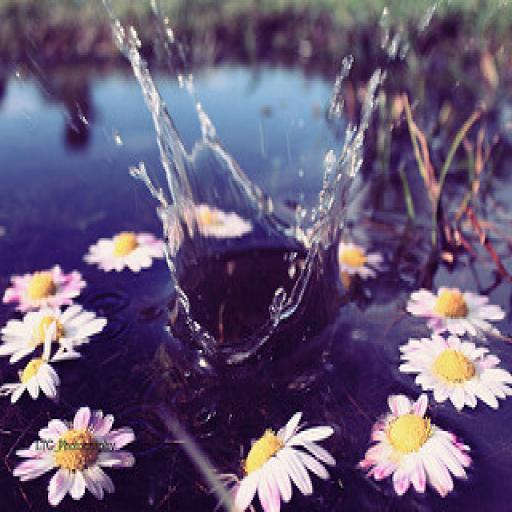

In [6]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[2]))

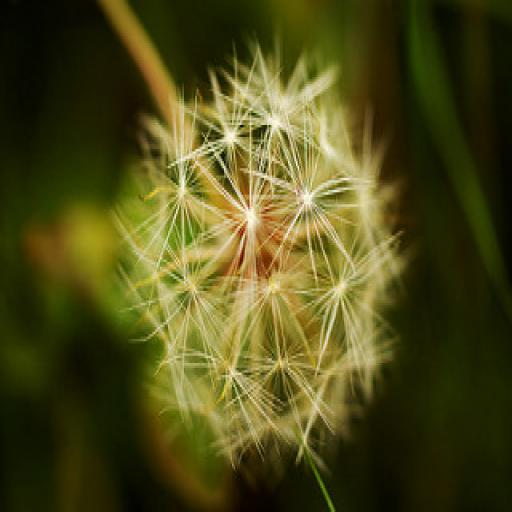

In [17]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[0]))

# Create a dataset

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
flower_classes = { 'daisy':0 , 'dandelion':1}
flower_dic = {}

for flower in flower_classes:
  flower_dic[flower] = list(data_dir.glob(flower+'/*'))

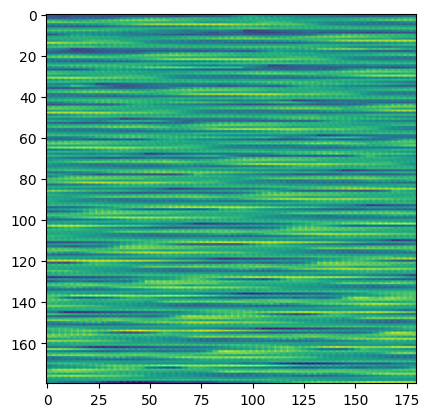

In [9]:
img = cv2.imread( str(flower_dic['daisy'][0]) )
img.resize(img_width , img_height )
plt.imshow(img)

In [10]:
X,y = [] , []

for flower,path_list in flower_dic.items():
    for path in path_list:
        img = cv2.imread(str(path))
        resized_img = cv2.resize(img  , (img_width , img_height) )
        X.append(resized_img)
        y.append(flower_classes[flower]) 
        


In [11]:
X = np.array(X)
y = np.array(y)
X[0] , y[0]

(array([[[130, 136, 135],
         [138, 143, 142],
         [144, 146, 146],
         ...,
         [152, 154, 154],
         [152, 154, 154],
         [149, 151, 151]],
 
        [[129, 135, 134],
         [137, 142, 141],
         [143, 145, 145],
         ...,
         [152, 155, 155],
         [151, 153, 153],
         [146, 148, 148]],
 
        [[128, 134, 133],
         [136, 142, 140],
         [142, 144, 144],
         ...,
         [153, 155, 155],
         [151, 153, 153],
         [145, 147, 147]],
 
        ...,
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [124, 125, 129],
         [124, 125, 129],
         [124, 125, 129]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [125, 126, 130],
         [125, 126, 130],
         [125, 126, 130]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [126, 127, 131],
  

In [12]:
X.shape , y.shape

((1821, 180, 180, 3), (1821,))

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 15 , stratify  = y , test_size=0.3 )

In [14]:
X_train.shape , X_test.shape

((1274, 180, 180, 3), (547, 180, 180, 3))

# Keras Model
The Keras Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). This model has not been tuned for high accuracy; the goal of this tutorial is to show a standard approach.

In [26]:
model = Sequential( [
  layers.Rescaling( 1/ 255 , input_shape = (img_width , img_height ,3)),
  layers.Conv2D(16 , 3  ,padding='same', activation='relu') ,
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Conv2D(64, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(30, activation='relu'),
  layers.Dense(2 , activation = 'sigmoid')
])


In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model summary
View all the layers of the network using the Keras Model.summary method

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 64800)             0

In [29]:
model_result = model.fit(X_train , y_train , epochs = 5 ,  batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


c:\Users\vk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 39s 882ms/step - loss: 0.7811 - accuracy: 0.5165 - val_loss: 0.6840 - val_accuracy: 0.6508
Epoch 2/5
40/40 [==============================] - 33s 821ms/step - loss: 0.6694 - accuracy: 0.6256 - val_loss: 0.6662 - val_accuracy: 0.7239
Epoch 3/5
40/40 [==============================] - 38s 950ms/step - loss: 0.6318 - accuracy: 0.7166 - val_loss: 0.6253 - val_accuracy: 0.7386
Epoch 4/5
40/40 [==============================] - 35s 873ms/step - loss: 0.5454 - accuracy: 0.7630 - val_loss: 0.4954 - val_accuracy: 0.7733
Epoch 5/5
40/40 [==============================] - 38s 956ms/step - loss: 0.4272 - accuracy: 0.8226 - val_loss: 0.5057 - val_accuracy: 0.7569


In [30]:
model.evaluate(X_test , y_test)

18/18 [==============================] - 4s 202ms/step - loss: 0.5057 - accuracy: 0.7569


[0.5056602358818054, 0.7568555474281311]

In [31]:
y_pred = model.predict(X_test)
y_score = [ np.argmax(y) for y in y_pred ]


18/18 [==============================] - 4s 231ms/step


In [33]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test , y_score))
sns.heatmap(confusion_matrix( y_score , y_test ) , annot=True)


              precision    recall  f1-score   support

           0       0.89      0.48      0.63       231
           1       0.72      0.96      0.82       316

    accuracy                           0.76       547
   macro avg       0.80      0.72      0.72       547
weighted avg       0.79      0.76      0.74       547



In [41]:
model_result.history

{'loss': [0.7811229825019836,
  0.6694156527519226,
  0.631819486618042,
  0.5453851222991943,
  0.4271519184112549],
 'accuracy': [0.5164835453033447,
  0.6255887150764465,
  0.7166405320167542,
  0.7629513144493103,
  0.8226059675216675],
 'val_loss': [0.6840201020240784,
  0.6661679744720459,
  0.6252772808074951,
  0.4953533411026001,
  0.5056602358818054],
 'val_accuracy': [0.650822639465332,
  0.7239488363265991,
  0.7385740280151367,
  0.7733089327812195,
  0.7568555474281311]}

# Visualize training results
Create plots of the loss and accuracy on the training and validation sets:

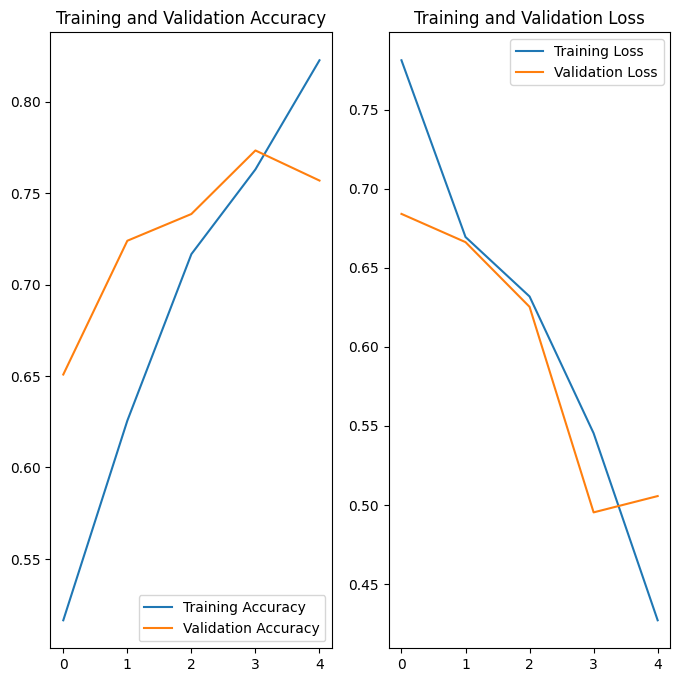

In [42]:
acc = model_result.history['accuracy']
val_acc = model_result.history['val_accuracy']

loss = model_result.history['loss']
val_loss = model_result.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<li> Training Accuracy : 100% </li>
<li> Testing Accuracy : 60% </li>
<b> This shows overfitting due to data has less variety</b>
<div style = 'color:red'> The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 60% accuracy on the validation set.</div>

# Overfitting
In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use data augmentation and add dropout to your model.

# Using Data Augmentation for addresing Overfitting 
Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

* You will implement data augmentation using the following Keras preprocessing layers: 
1. tf.keras.layers.RandomFlip, 
2. tf.keras.layers.RandomRotation, 
3. tf.keras.layers.RandomZoom.
* These can be included inside your model like other layers, and run on the GPU.

In [33]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.1),
  ]
)

In [91]:
# data_augmentation = keras.Sequential(
#   [
#     # layers.experimental.preprocessing.RandomZoom(0.4),
#     layers.experimental.preprocessing.RandomRotation(0.9),
#     # layers.RandomZoom(0.1),
#   ]
# )

original img


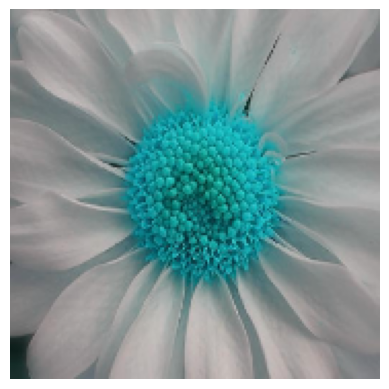

In [16]:
print('original img')
plt.axis('off')
plt.imshow(X[0])
plt.show()

augmentated images : 
(180, 180, 3)


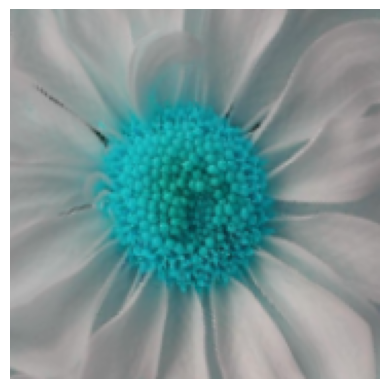

In [21]:
print('augmentated images : ')

augmented_images = data_augmentation(X[0])
print(augmented_images.shape)
plt.axis('off')
plt.imshow(augmented_images.numpy().astype('uint8'))
plt.show()


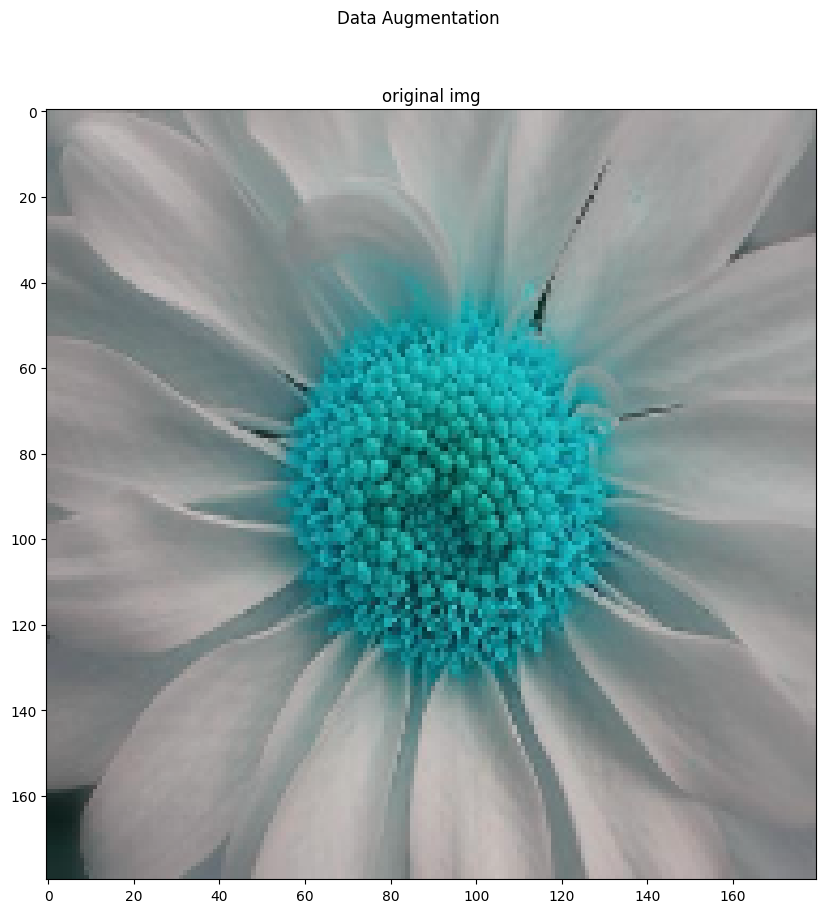

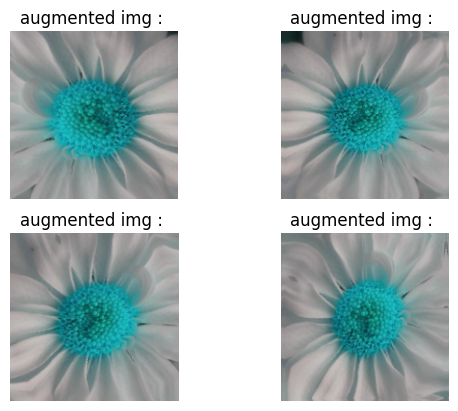

In [44]:
plt.figure(figsize=(10, 10))
plt.suptitle("Data Augmentation")
for img in X[:1]:
  plt.title('original img')
  ax =  plt.subplot(1, 1,  1)
  plt.imshow(img)
  plt.show()
  for i in range(4):
    augmented_images = data_augmentation(img)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images.numpy().astype("uint8"))  
    plt.title('augmented img : ')
    plt.axis("off")

# Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [47]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(30, name='last-hidden' ,  activation='relu'),
  layers.Dense(2, name="outputs" , activation = 'sigmoid')
])

Compile and train the model


In [50]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [51]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (180, 180, 3)             0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [49]:
epochs = 5
model_result = model.fit(X_train , y_train , epochs = epochs ,  batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5


c:\Users\vk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 53s 1s/step - loss: 0.7361 - accuracy: 0.5549 - val_loss: 0.6299 - val_accuracy: 0.5777
Epoch 2/5
40/40 [==============================] - 50s 1s/step - loss: 0.6488 - accuracy: 0.5620 - val_loss: 0.6160 - val_accuracy: 0.5777
Epoch 3/5
40/40 [==============================] - 54s 1s/step - loss: 0.6433 - accuracy: 0.5777 - val_loss: 0.6319 - val_accuracy: 0.5777
Epoch 4/5
40/40 [==============================] - 56s 1s/step - loss: 0.6373 - accuracy: 0.5777 - val_loss: 0.6066 - val_accuracy: 0.5777
Epoch 5/5
40/40 [==============================] - 55s 1s/step - loss: 0.6286 - accuracy: 0.5981 - val_loss: 0.6057 - val_accuracy: 0.6819


In [52]:
y_pred = model.predict(X_test)
y_score = [ np.argmax(y) for y in y_pred ]


18/18 [==============================] - 5s 252ms/step


# Visualize training results
After applying data augmentation and tf.keras.layers.Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned:

              precision    recall  f1-score   support

           0       0.63      0.58      0.61       231
           1       0.71      0.75      0.73       316

    accuracy                           0.68       547
   macro avg       0.67      0.67      0.67       547
weighted avg       0.68      0.68      0.68       547



<Axes: >

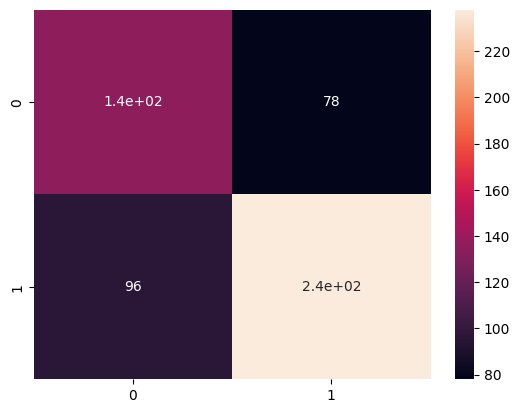

In [53]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test , y_score))
sns.heatmap(confusion_matrix( y_score , y_test ) , annot=True)


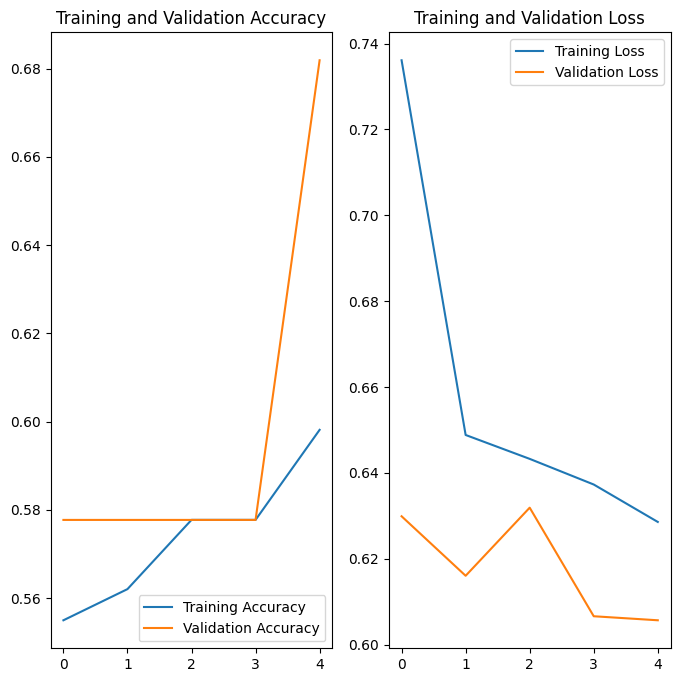

In [54]:
acc = model_result.history['accuracy']
val_acc = model_result.history['val_accuracy']

loss = model_result.history['loss']
val_loss = model_result.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()